### March 2024: END SEMESTER ASSESSMENT (ESA)
## M TECH DATA SCIENCE AND MACHINE LEARNING_ SEMESTER II

### UE20CS935: Introduction to Deep Learning and Applications


#### Section C: Question 4:

Use the Transfer learning technique to improve the previous section model’s classification performance.
The pre-trained models weights are given to you. The architecture of pre-trained model till convolution layers and its corresponding weights are already saved under the folder ‘base_model’. The given model convolution layers already freezed. (Note: This pre-trained model provided is MobileNet).

Load these weights along with architecture using the following syntax:

cust_model=tf.keras.models.load_model("base_model")

“base_model” is the folder name under all the required models files are exist.

Design the remaining layers of network in your own way (from flattening to output layer) and train only its weights with the dataset given.


In [3]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, GlobalAveragePooling2D
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import os
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"]="0"

In [4]:
train_dir="Rock-Paper-Scissors/train"
test_dir="Rock-Paper-Scissors/test"

In [5]:
# Split train and validation date in 80:20 ratio
datagram = ImageDataGenerator(rescale=1./255,validation_split=0.2)
# Train data

img_height,img_width=128,128

# Train data in case test data is used as validation
print("Train data details:")
train_data = datagram.flow_from_directory(
    train_dir,
    target_size=(img_height,img_width),
    batch_size=20,
    class_mode='categorical',
)


# Test data
print("\nTest data details:")
test_data = datagram.flow_from_directory(
    test_dir,
    target_size=(img_height,img_width),
    batch_size=20,
    class_mode='categorical'
)


Train data details:
Found 297 images belonging to 3 classes.

Test data details:
Found 216 images belonging to 3 classes.


In [6]:
#Load the pre-trained model using the below command
Base_Folder = 'base_model' # Provided base model directory
#import tf_keras as k3
#base_model = k3.models.load_model(Base_Folder)
base_model = tf.keras.models.load_model(Base_Folder) # Incase above doesnt work

In [7]:
base_model.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_3 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 Conv1_pad (ZeroPadding2D)   (None, 225, 225, 3)          0         ['input_3[0][0]']             
                                                                                                  
 Conv1 (Conv2D)              (None, 112, 112, 32)         864       ['Conv1_pad[0][0]']           
                                                                                                  
 bn_Conv1 (BatchNormalizati  (None, 112, 112, 32)         128       ['Conv1[0][0]']               
 on)                                                                           

In [8]:
type(base_model)

keras.src.engine.functional.Functional

In [9]:
for layer_number, layer in enumerate(base_model.layers):
  print(layer_number, layer.name, layer.trainable)

0 input_3 True
1 Conv1_pad False
2 Conv1 False
3 bn_Conv1 False
4 Conv1_relu False
5 expanded_conv_depthwise False
6 expanded_conv_depthwise_BN False
7 expanded_conv_depthwise_relu False
8 expanded_conv_project False
9 expanded_conv_project_BN False
10 block_1_expand False
11 block_1_expand_BN False
12 block_1_expand_relu False
13 block_1_pad False
14 block_1_depthwise False
15 block_1_depthwise_BN False
16 block_1_depthwise_relu False
17 block_1_project False
18 block_1_project_BN False
19 block_2_expand False
20 block_2_expand_BN False
21 block_2_expand_relu False
22 block_2_depthwise False
23 block_2_depthwise_BN False
24 block_2_depthwise_relu False
25 block_2_project False
26 block_2_project_BN False
27 block_2_add False
28 block_3_expand False
29 block_3_expand_BN False
30 block_3_expand_relu False
31 block_3_pad False
32 block_3_depthwise False
33 block_3_depthwise_BN False
34 block_3_depthwise_relu False
35 block_3_project False
36 block_3_project_BN False
37 block_4_expand Fal

In [10]:
# load the model and add 2 layers (1. do global Average pooling, 2. add the output layer as dense layer )
# add the input layer with image size (224,224,3) and then add the pre-trained model (Hint: Base_model(inputs,training=False))
# do global Average pooling (Hint: tf.keras.layers.GlobalAveragePooling2D()(previous layer o/p))
# add denselayer with activation function= softmax and with number of output classes)
# Create the model with [tf.keras.Model(inputs,outputs)]
# Infer the model summary

In [11]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.applications import MobileNetV2

# Load a pre-trained MobileNetV2 model

base_model.trainable = False  # Freeze the base model

# Define the input layer
inputs = layers.Input(shape=(224, 224, 3), name='input_layer')

# Pass the input through the base model
x = base_model(inputs, training=False)

# Apply global average pooling
x = layers.GlobalAveragePooling2D()(x)

# Add a Dense layer for classification
outputs = layers.Dense(3, activation='softmax', name="output_layer")(x)

# Create the model
model = tf.keras.Model(inputs, outputs)

# Display the model summary
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 mobilenetv2_1.00_224 (Func  (None, 7, 7, 1280)        2257984   
 tional)                                                         
                                                                 
 global_average_pooling2d (  (None, 1280)              0         
 GlobalAveragePooling2D)                                         
                                                                 
 output_layer (Dense)        (None, 3)                 3843      
                                                                 
Total params: 2261827 (8.63 MB)
Trainable params: 3843 (15.01 KB)
Non-trainable params: 2257984 (8.61 MB)
_________________________________________________________________


In [12]:
# compile the model
# Use model checkpoint to fetch the best model
# fit the model to train data
    #epochs=10,
    #validation_data=test_data,
    #callbacks=keras_callback

In [13]:
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# Compile the model
model.compile(
    loss="categorical_crossentropy",
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),  # Explicitly set a learning rate
    metrics=['accuracy']
)

# Define callbacks
callbacks = [
    EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True),  # Stop training early if no improvement
    ModelCheckpoint(
        #filepath='best_model.keras',  # Save in native Keras format
        filepath='best_model',  # optionally
        monitor='val_loss',
        save_best_only=True,
        save_weights_only=False
    )
]

# Train the model with validation
history = model.fit(
    train_data,
    epochs=10,
    #validation_data=val_data,
    validation_data=test_data,
    callbacks=callbacks  # Use defined callbacks
)




Epoch 1/10
15/15 [==============================] - ETA: 0s - loss: 0.5907 - accuracy: 0.7710INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


15/15 [==============================] - 14s 832ms/step - loss: 0.5907 - accuracy: 0.7710 - val_loss: 1.1150 - val_accuracy: 0.4769
Epoch 2/10
15/15 [==============================] - ETA: 0s - loss: 0.0749 - accuracy: 0.9832INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


15/15 [==============================] - 12s 821ms/step - loss: 0.0749 - accuracy: 0.9832 - val_loss: 1.0731 - val_accuracy: 0.5741
Epoch 3/10
15/15 [==============================] - ETA: 0s - loss: 0.0239 - accuracy: 1.0000INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


15/15 [==============================] - 12s 856ms/step - loss: 0.0239 - accuracy: 1.0000 - val_loss: 1.0587 - val_accuracy: 0.5324
Epoch 4/10
15/15 [==============================] - ETA: 0s - loss: 0.0140 - accuracy: 1.0000INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


15/15 [==============================] - 12s 826ms/step - loss: 0.0140 - accuracy: 1.0000 - val_loss: 1.0226 - val_accuracy: 0.5741
Epoch 5/10
15/15 [==============================] - ETA: 0s - loss: 0.0108 - accuracy: 1.0000INFO:tensorflow:Assets written to: best_model\assets


INFO:tensorflow:Assets written to: best_model\assets


15/15 [==============================] - 11s 781ms/step - loss: 0.0108 - accuracy: 1.0000 - val_loss: 1.0144 - val_accuracy: 0.5741
Epoch 6/10
15/15 [==============================] - 2s 141ms/step - loss: 0.0086 - accuracy: 1.0000 - val_loss: 1.0284 - val_accuracy: 0.5648
Epoch 7/10
15/15 [==============================] - 2s 153ms/step - loss: 0.0075 - accuracy: 1.0000 - val_loss: 1.0381 - val_accuracy: 0.5602
Epoch 8/10
15/15 [==============================] - 2s 164ms/step - loss: 0.0063 - accuracy: 1.0000 - val_loss: 1.0201 - val_accuracy: 0.5787
Epoch 9/10
15/15 [==============================] - 2s 169ms/step - loss: 0.0055 - accuracy: 1.0000 - val_loss: 1.0217 - val_accuracy: 0.5694
Epoch 10/10
15/15 [==============================] - 3s 170ms/step - loss: 0.0048 - accuracy: 1.0000 - val_loss: 1.0157 - val_accuracy: 0.5694


In [14]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 mobilenetv2_1.00_224 (Func  (None, 7, 7, 1280)        2257984   
 tional)                                                         
                                                                 
 global_average_pooling2d (  (None, 1280)              0         
 GlobalAveragePooling2D)                                         
                                                                 
 output_layer (Dense)        (None, 3)                 3843      
                                                                 
Total params: 2261827 (8.63 MB)
Trainable params: 3843 (15.01 KB)
Non-trainable params: 2257984 (8.61 MB)
_________________________________________________________________


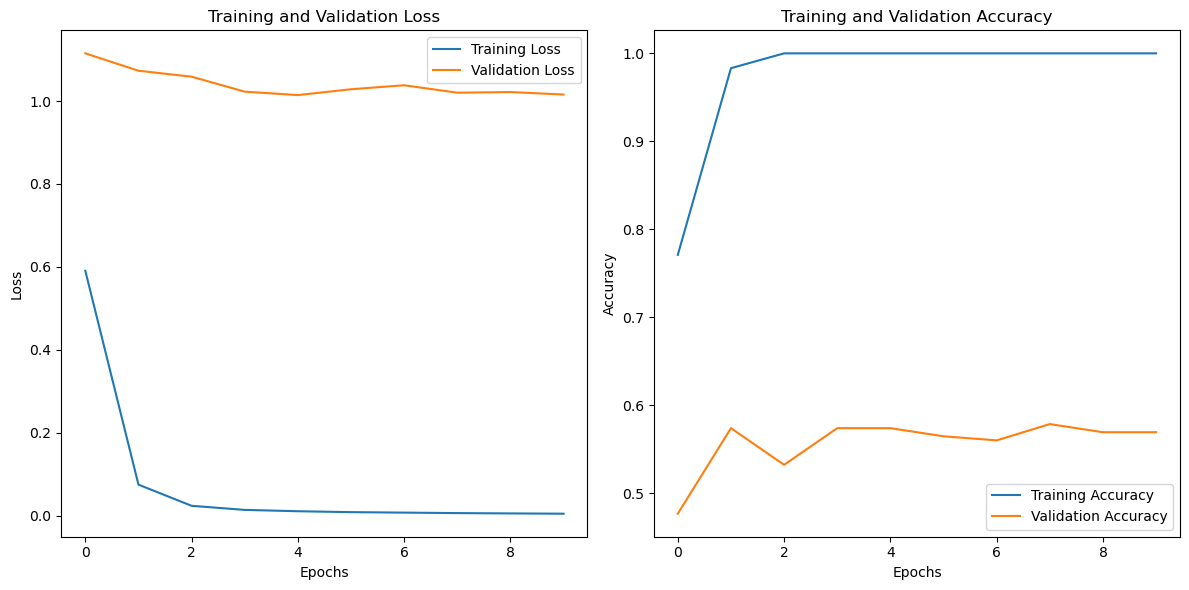

In [15]:
# Plot training and validation loss and accuracy of base model
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

# Plot the training and validation loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot the training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [16]:
# Evaluate on test data separately after training on test data
test_loss, test_accuracy = model.evaluate(
    test_data,
    steps=len(test_data)
)

print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")


11/11 [==============================] - 1s 85ms/step - loss: 1.0144 - accuracy: 0.5741
Test Loss: 1.014370322227478
Test Accuracy: 0.5740740895271301


##### Key Observations:
Initial Model Performance:

Test Accuracy: 47.69%
Test Loss: 2.9677

Pretrained Model Performance:

Test Accuracy: 56.94%
Test Loss: 1.0930

##### Analysis of Improvements:
Test Accuracy:

Test accuracy has increased from 47.69% to 56.94%, which represents a notable improvement in the model's ability to classify unseen data correctly. This indicates that using the pretrained model has enhanced the learning process by leveraging features learned on a larger dataset.
Test Loss:

Test loss has decreased significantly from 2.9677 to 1.0930. A lower loss indicates that the model's predictions are closer to the ground truth, reflecting better optimization of the network.

##### Generalization:

The pretrained model demonstrates better generalization compared to the initial model. Pretrained models often help accelerate convergence and improve performance, especially when the training dataset is limited.

##### Conclusion:
The pretrained model has shown a significant improvement over the initial model:

Test accuracy increased from 47.69% to 56.94%.
Test loss decreased from 2.9677 to 1.0930.